In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable # si os da un error este comando es por no tenerlo instalado, 

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('archivo_limpio.csv')
df.head(2)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,lenguaje_recomendado,experiencia_ML,industria,tamaño_empresa,salario,herramienta_DA,lenguaje_utilizado,IDE,herramientas_visualizacion,Q16_frame_ml,Q17_alg_ml,Q32_prod_bigdata,Q34_herramientas_bi,Q28,q10_notebooks,q39_plat_compartir_trabajo,q40_plat_cursos,q27_plat_familiar_cloud_computing,q29b_productos_familiar_cloud_computing,q31b_productos_familiar_ml,q32b_productos_familiar_bd,q34b_herramientas_familiar_bi,q36b_cat_herramientas_familiar_ml,q37b_cat_herramientas_familiar_ml_aut,q38b_herramientas_familiar_gest_exp_ml
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,5-10 years,Manufacturing/Fabrication,50-249 employees,30000.0,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",PostgreSQL,None,NaN,Colab Notebooks,"GitHub , Kaggle","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",70000.0,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",NaN,NaN,NaN,"Kaggle Notebooks,Colab Notebooks",NaN,"Kaggle Learn Courses,Cloud-certification progr...","Google Cloud Platform (GCP) , Oracle Cloud",Google Cloud Compute Engine,None,"MySQL ,SQLite ,Oracle Database ,Google Cloud SQL","Google Data Studio,Qlik","Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML,None


In [4]:
def data_pregunta(dataf, colum):  # funcion para hacer df con la columna que queremos separar
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

df_plataforma =data_pregunta(df,'q39_plat_compartir_trabajo') # llamada a la función para hacer dataframe con la col q y otrs columnas relevantes

/tmp/ipykernel_3720/1658133390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


-----------------------------------------------------------------------
### Plataformas para compartir trabajo Q39
----------------------------------

In [5]:
lista_ordenada = df_plataforma["q39_plat_compartir_trabajo"].value_counts().index.tolist() #para ordenar los resultados de la gráfica

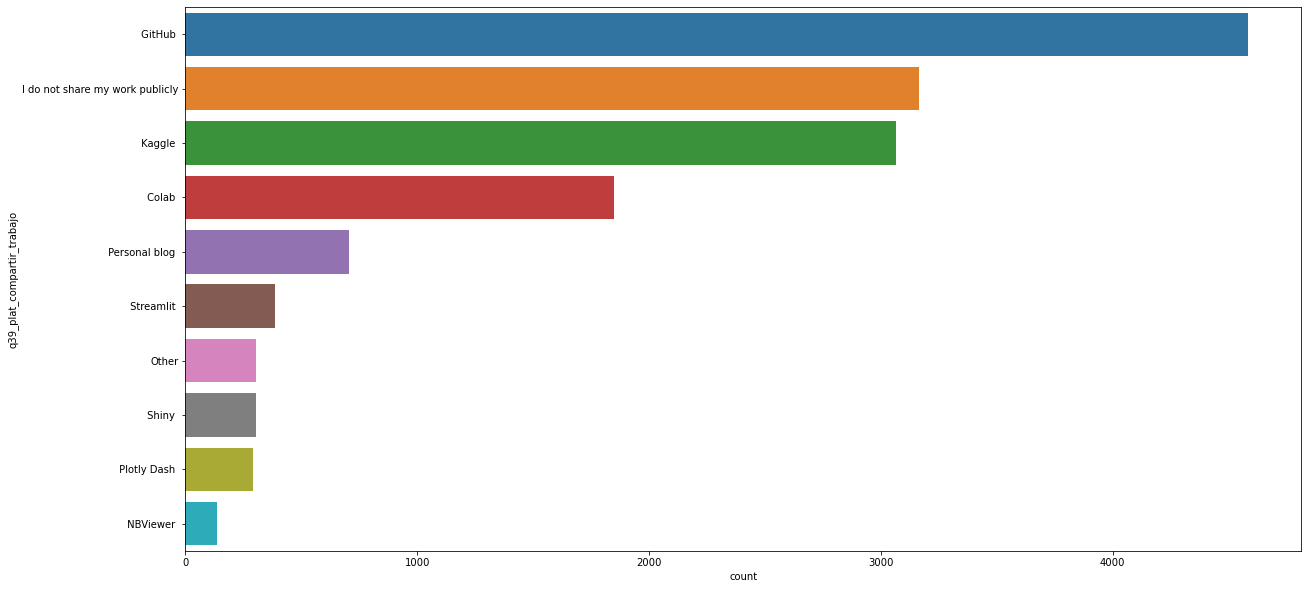

In [6]:
plt.figure(figsize=(20,10))
fig = sns.countplot(y='q39_plat_compartir_trabajo',data=df_plataforma,order = lista_ordenada)

Se aprecia que la plataforma GitHub es la más utilizada. Llama la atención la gran cantidad de personas que no comparten su trabajo públicamente, en número similar a los que utilizan la plataforlma Kaggle. Google colab también está presente pero en menor medida.

In [7]:
# df con las cuatro plataformas más usadas
lista_plataformas = df_plataforma['q39_plat_compartir_trabajo'].value_counts()[:4].index.tolist()
lista_plataformas

[' GitHub ', 'I do not share my work publicly', ' Kaggle ', ' Colab ']

In [8]:
df_plat_mas = df_plataforma.loc[df_plataforma['q39_plat_compartir_trabajo'].isin(lista_plataformas)]
df_plat_mas['q39_plat_compartir_trabajo'].value_counts()

 GitHub                            4586
I do not share my work publicly    3167
 Kaggle                            3065
 Colab                             1848
Name: q39_plat_compartir_trabajo, dtype: int64

In [9]:
df_plat_mas

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,q39_plat_compartir_trabajo
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,GitHub
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Kaggle
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000.0,I do not share my work publicly
4,45-49,Man,India,Doctoral degree,Other,< 1 years,40000.0,I do not share my work publicly
7,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,20000.0,Kaggle
...,...,...,...,...,...,...,...,...
25963,60-69,Man,United States of America,Bachelor’s degree,Program/Project Manager,20+ years,500000.0,I do not share my work publicly
25967,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,90000.0,GitHub
25967,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,90000.0,Colab
25968,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,20000.0,GitHub


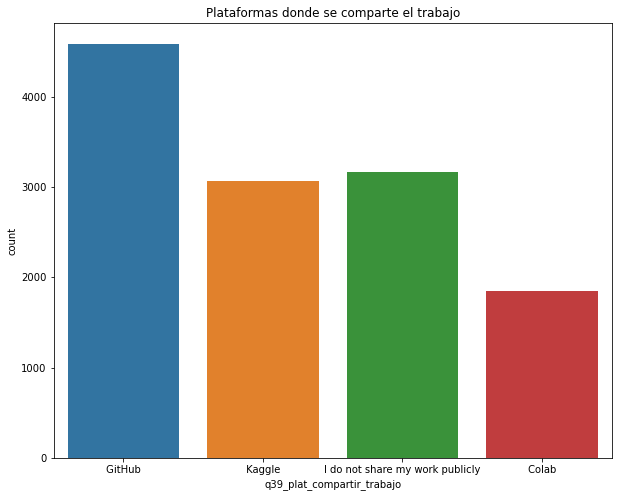

In [10]:
#Gráfica de Plataformas donde se comparte públicamente el trabajo
plt.figure(figsize=(10,8))
sns.countplot(x = 'q39_plat_compartir_trabajo', data = df_plat_mas)
plt.title(label = "Plataformas donde se comparte el trabajo")
plt.show()

------------
### Plataformas donde se realizan Cursos Q40
----------


In [11]:

def data_pregunta(dataf, colum):  # funcion para hacer df con la columna que queremos separar
    df = dataf[["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario",colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [12]:
df_cursos =data_pregunta(df,'q40_plat_cursos')
df_cursos.head(2)

/tmp/ipykernel_3720/1325171681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")


,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,q40_plat_cursos
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Coursera
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,edX


In [13]:
lista_columnas=["edad", "genero", "pais", "estudios", "puesto_trabajo", "experiencia", "salario"]

In [14]:
lista_cursos = df_cursos['q40_plat_cursos'].value_counts()[:4].index.tolist()
lista_cursos

['Coursera',
 'Kaggle Learn Courses',
 'Udemy',
 'University Courses (resulting in a university degree)']

In [17]:
df_cursos_mas = df_cursos.loc[df_cursos['q40_plat_cursos'].isin(lista_cursos)]
df_cursos_mas.head(2)

,edad,genero,pais,estudios,puesto_trabajo,experiencia,salario,q40_plat_cursos
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Coursera
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000.0,Kaggle Learn Courses


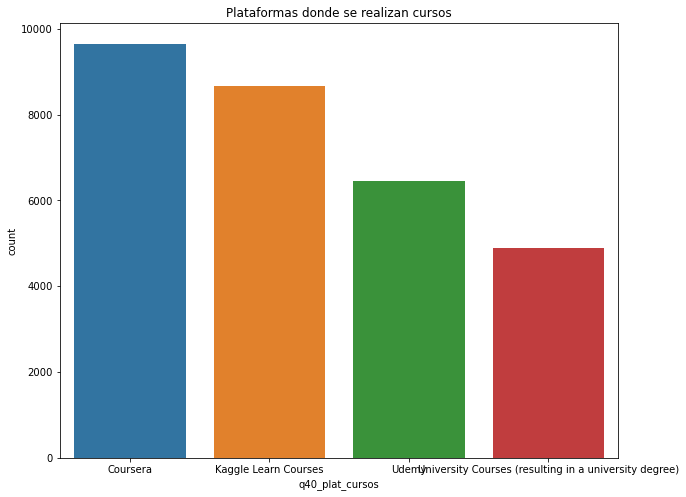

In [21]:
#Gráfica de Plataformas donde se hacen cursos
plt.figure(figsize=(10,8))
sns.countplot(x = 'q40_plat_cursos', data =df_cursos_mas)
plt.title(label = "Plataformas donde se realizan cursos")
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

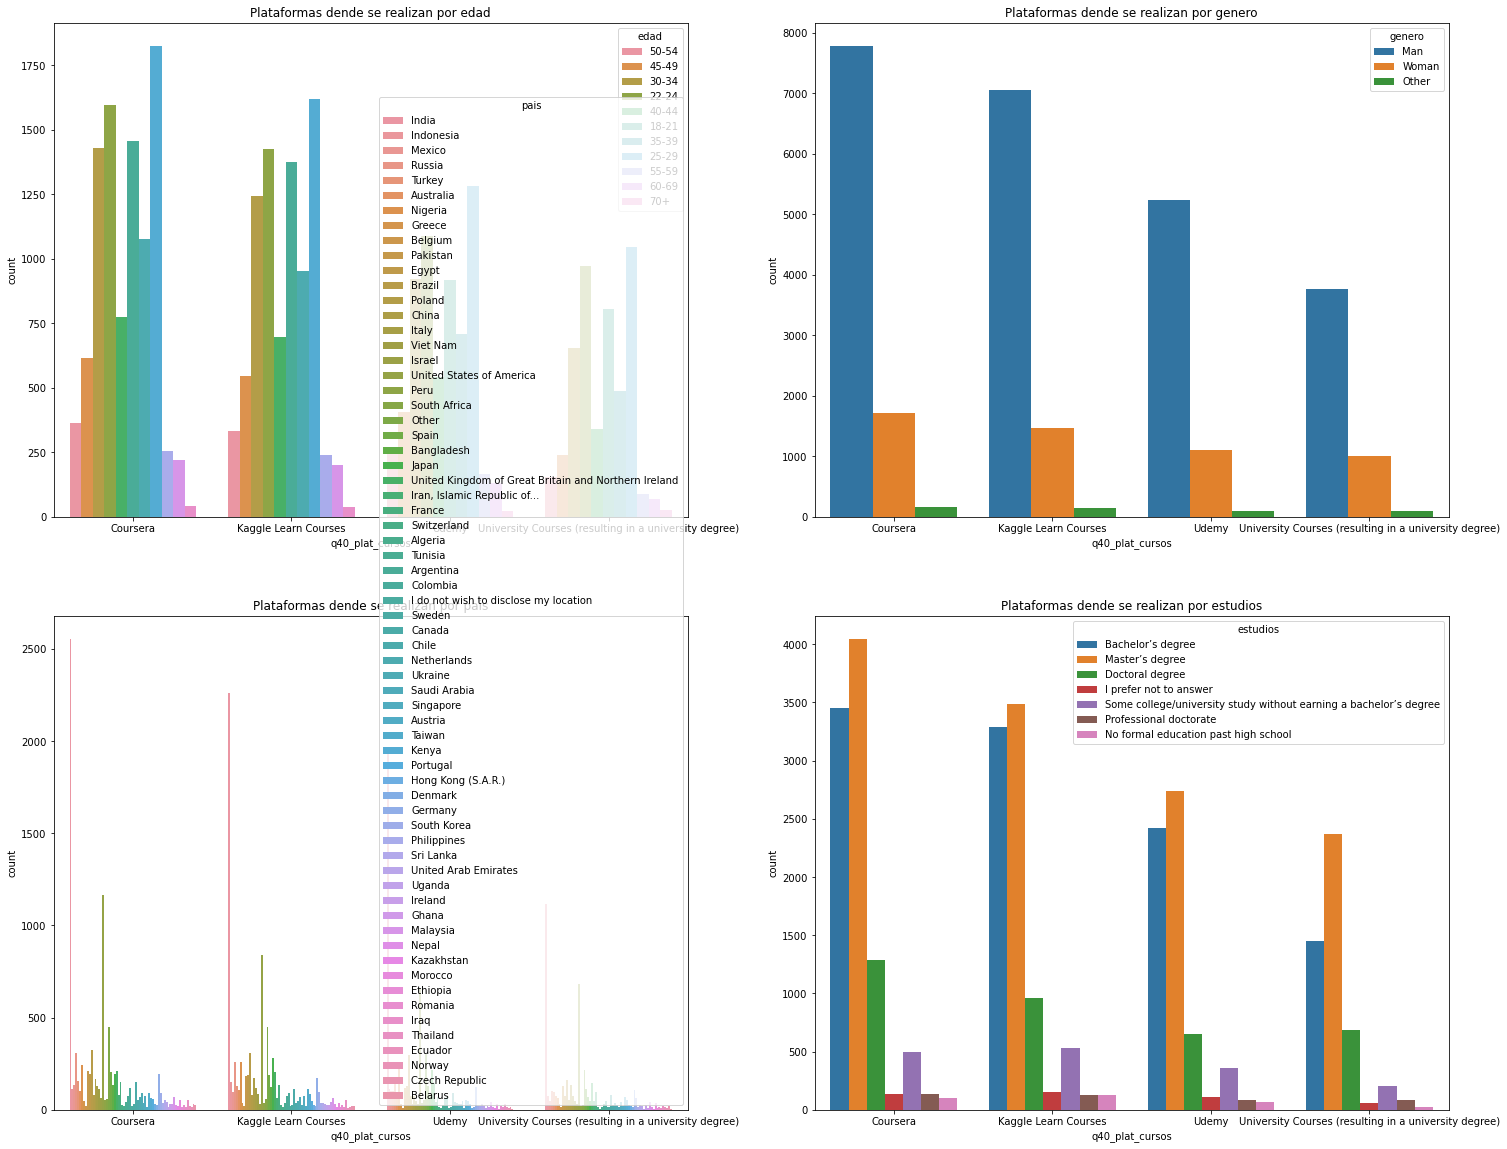

In [18]:
fig, axes = plt.subplots(2,2,figsize= (25,20))
axes = axes.flat
for indice, columna in enumerate(lista_columnas):
    sns.countplot(data = df_cursos_mas, x = "q40_plat_cursos", hue= columna, ax = axes[indice])
    axes[indice].set_title(f"Plataformas dende se realizan por {columna}")
fig.delaxes(axes[-1])
plt.show()

In [ ]:
data_39_freq =df_plataforma.stb.freq(['q39_plat_compartir_trabajo'],thresh =90,other_label = 'otros')
data_39_freq

,q39_plat_compartir_trabajo,count,percent,cumulative_count,cumulative_percent
0,GitHub,4586,30.990674,4586,30.990674
1,I do not share my work publicly,3167,21.401541,7753,52.392215
2,Kaggle,3065,20.712258,10818,73.104474
3,Colab,1848,12.488174,12666,85.592648
4,otros,2132,14.407352,14798,100.000000


In [ ]:
data_40_freq = df_cursos.stb.freq(['q40_plat_cursos'],thresh =60,other_label = 'otros')
data_40_freq

,q40_plat_cursos,count,percent,cumulative_count,cumulative_percent
0,Coursera,9649,17.744635,9649,17.744635
1,Kaggle Learn Courses,8670,15.944241,18319,33.688876
2,Udemy,6440,11.843243,24759,45.532118
3,University Courses (resulting in a university ...,4882,8.978061,29641,54.510179
4,otros,24736,45.489821,54377,100.000000
